In [431]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import *
import joblib


%matplotlib inline

In [432]:
data= pd.read_json("motos.json")

data = data.drop(["id"], axis=1)
data = data.astype({"brand": str}, errors='raise') 
data = data.astype({"model": str}, errors='raise') 
data = data.astype({"version": str}, errors='raise') 

data.head()

,brand,model,version,year,km,sell_price
0,YAMAHA,X-MAX,250,2018,40000,4990
1,HONDA,LEAD,110,2017,12000,2000
2,SUZUKI,GSX,1250 FA,2017,19100,7590
3,YAMAHA,YZF,R1,2005,50000,4690
4,DUCATI,HYPERMOTARD,939,2021,9000,12490


In [433]:
data.describe(include=[np.number])

,year,km,sell_price
count,2240.000000,2240.000000,2.240000e+03
mean,2012.609375,30824.821875,9.412800e+03
std,6.002947,24717.289101,2.112173e+05
min,1985.000000,5.000000,7.900000e+02
25%,2007.000000,10000.000000,2.490000e+03
50%,2013.000000,25000.000000,3.890000e+03
75%,2018.000000,40000.000000,6.290000e+03
max,2022.000000,380000.000000,9.999999e+06


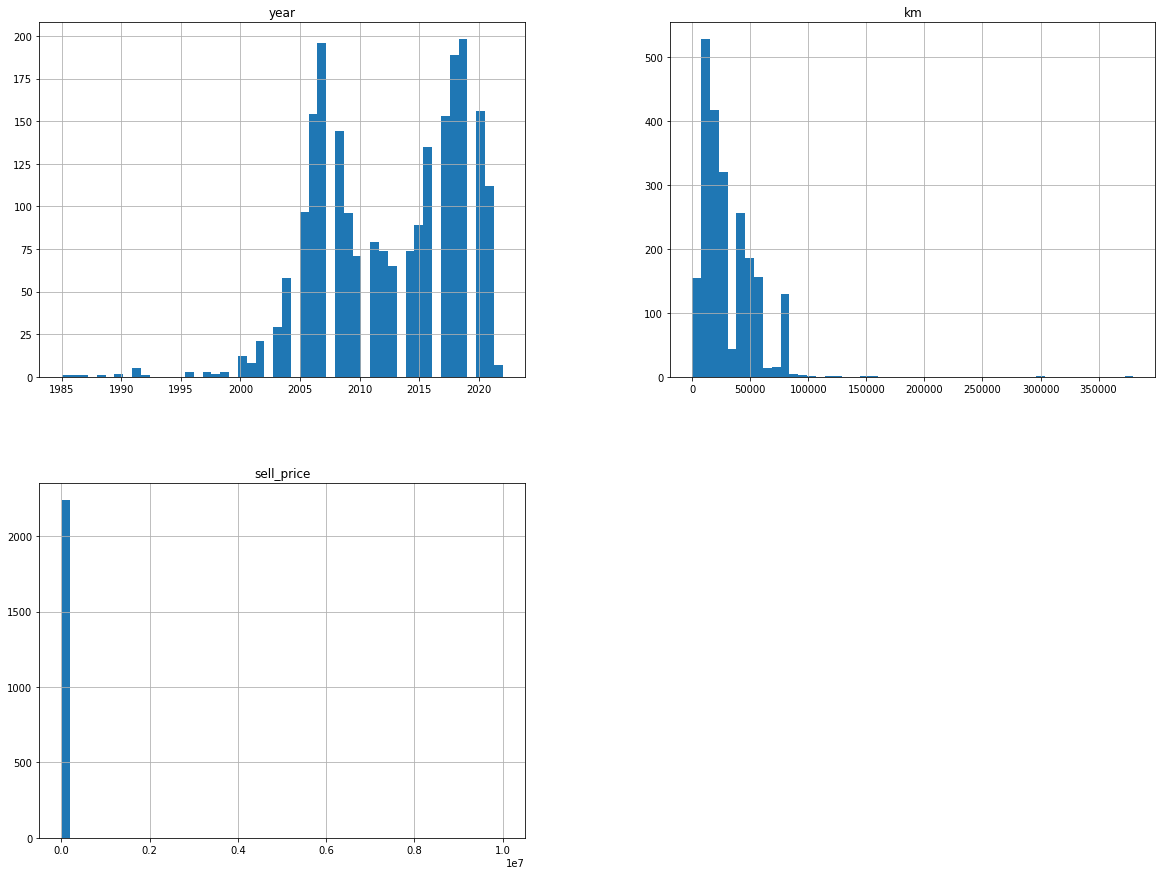

In [434]:
data.hist(bins=50, figsize=(20,15))

plt.show()

In [435]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=40)
len(train_set)

1792

In [436]:
len(test_set)

448

In [437]:
corr_matrix = data.corr()
corr_matrix["sell_price"].sort_values(ascending=False)

sell_price    1.000000
km           -0.013022
year         -0.021282
Name: sell_price, dtype: float64

In [438]:
data =  train_set.drop(["sell_price"], axis=1)
data_labels = train_set["sell_price"].copy()

data_num = data.select_dtypes(include=[np.number])
data_num.head()

,year,km
661,2020,20000
1017,2015,20000
1480,2019,10000
1899,2009,40000
2212,2015,30000


In [439]:
data_cat = data.select_dtypes(include=object)

data_cat = data_cat.astype({"brand": str}, errors='raise') 
data_cat = data_cat.astype({"model": str}, errors='raise') 
data_cat = data_cat.astype({"version": str}, errors='raise') 

data_cat.head()

,brand,model,version
661,BENELLI,TRK,502
1017,PEUGEOT,METROPOLIS,400
1480,HARLEY DAVIDSON,SPORTSTER,883
1899,YAMAHA,T-MAX,500
2212,BMW,R,1200 R


In [440]:
cat_encoder = OneHotEncoder(sparse=False)
data_cat_1hot = cat_encoder.fit_transform(data_cat)
data_cat_1hot

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [441]:
cat_encoder.categories_

[array(['APRILIA', 'Aprilia', 'BENELLI', 'BETA', 'BMW', 'Brixton',
        'CAGIVA', 'Cf moto', 'DAELIM', 'DERBI', 'DUCATI', 'GASGAS', 'Goes',
        'HARLEY DAVIDSON', 'HONDA', 'HUSQVARNA', 'HYOSUNG', 'Hanway',
        'Harley Davidson', 'Harley davidson', 'KAWASAKI', 'KEEWAY', 'KTM',
        'KYMCO', 'Kawasaki', 'MACBOR', 'MALAGUTI', 'MASH', 'MONDIAL',
        'MOTO GUZZI', 'MOTOR HISPANIA', 'MV AGUSTA', 'Mitt', 'PEUGEOT',
        'PIAGGIO', 'RIEJU', 'Royal enfield', 'SUZUKI', 'SYM', 'TRIUMPH',
        'VESPA', 'Voge', 'YAMAHA', 'Yamaha', 'brixton', 'dawdaw'],
       dtype=object),
 array(['1098', '1250 gs', '300', '502', '650', '650 mt', '749', '848',
        '@', 'ADVENTURE', 'AEROX', 'AFRICA TWIN', 'AGILITY', 'AK',
        'AMERICA', 'BAD BOY', 'BANDIT', 'BELLAGIO', 'BESBI', 'BEVERLY',
        'BLACK SEVEN', 'BN', 'BONNEVILLE', 'BOULEVAR', 'BRUTALE', 'BT',
        'BURGMAN', 'C', 'CAFE RACER', 'CAFÃ‰ RACER', 'CALIFORNIA', 'CB',
        'CBF', 'CBR', 'CITYSTAR', 'CMX', 'COMPAY', '

In [442]:
num_pipeline = Pipeline([
       ('std_scaler', StandardScaler()),
    ])

data_num_tr = num_pipeline.fit_transform(data_num)

data_num_tr

array([[ 1.21232596, -0.422544  ],
       [ 0.38046499, -0.422544  ],
       [ 1.04595377, -0.81715492],
       ...,
       [-0.78414038,  1.94512152],
       [-1.94874574,  1.94512152],
       [-1.11688477,  0.36667784]])

In [443]:
num_attribs = list(data_num)
cat_attribs = list(data_cat)

full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), num_attribs),
        ("cat", OneHotEncoder(handle_unknown = 'ignore'), cat_attribs),
    ])
#print(data)
data_prepared = full_pipeline.fit_transform(data)


In [444]:
print(np.asarray(data_prepared))

  (0, 0)	1.2123259598273988
  (0, 1)	-0.4225440004063826
  (0, 4)	1.0
  (0, 249)	1.0
  (0, 501)	1.0
  (1, 0)	0.38046498570782117
  (1, 1)	-0.4225440004063826
  (1, 35)	1.0
  (1, 168)	1.0
  (1, 478)	1.0
  (2, 0)	1.0459537650034834
  (2, 1)	-0.8171549207060277
  (2, 15)	1.0
  (2, 219)	1.0
  (2, 581)	1.0
  (3, 0)	-0.6177681832356721
  (3, 1)	0.3666778401929075
  (3, 44)	1.0
  (3, 236)	1.0
  (3, 493)	1.0
  (4, 0)	0.38046498570782117
  (4, 1)	-0.02793308010673756
  (4, 6)	1.0
  (4, 191)	1.0
  (4, 398)	1.0
  :	:
  (1787, 0)	1.2123259598273988
  (1787, 1)	-0.4225440004063826
  (1787, 16)	1.0
  (1787, 79)	1.0
  (1787, 536)	1.0
  (1788, 0)	0.5468371805317367
  (1788, 1)	0.3666778401929075
  (1788, 15)	1.0
  (1788, 219)	1.0
  (1788, 631)	1.0
  (1789, 0)	-0.7841403780595876
  (1789, 1)	1.945121521391488
  (1789, 44)	1.0
  (1789, 288)	1.0
  (1789, 660)	1.0
  (1790, 0)	-1.9487457418269962
  (1790, 1)	1.945121521391488
  (1790, 16)	1.0
  (1790, 81)	1.0
  (1790, 384)	1.0
  (1791, 0)	-1.11688476770741

In [445]:
#Train the model
lin_reg = LinearRegression()
lin_reg.fit(data_prepared, data_labels)

LinearRegression()

In [446]:
# let's try the full preprocessing pipeline on a few training instances
some_data = data.iloc[:5]
some_labels = data_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 2172.12866024  3241.78239821  5603.65822376  5156.55131252
 12533.58255744]


In [447]:
print("Labels:", list(some_labels))

Labels: [5190, 4290, 10490, 5490, 9790]


In [448]:
data_predictions = lin_reg.predict(data_prepared)
lin_mse = mean_squared_error(data_labels, data_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

228813.30390059517

In [449]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(data_prepared, data_labels)

DecisionTreeRegressor(random_state=42)

In [450]:
data_predictions = tree_reg.predict(data_prepared)
tree_mse = mean_squared_error(data_labels, data_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

101.80990676233506

In [451]:
data_prepared

<1792x703 sparse matrix of type '<class 'numpy.float64'>'
	with 8960 stored elements in Compressed Sparse Row format>

In [452]:
test_set

,brand,model,version,year,km,sell_price
871,KYMCO,GRAND DINK,300,2018,30000,2590
794,HONDA,[*AJ*] NC,750X,2019,20000,6690
740,BMW,[*AJ*] F,800 R,2012,80000,2590
1907,PIAGGIO,MEDLEY,125,2016,30000,2390
79,YAMAHA,MT,10,2018,32620,10490
...,...,...,...,...,...,...
84,HONDA,[*AJ*] VFR,800 FI CON ABS,2003,80000,3290
1442,BENELLI,LEONCINO,500,2018,10000,4490
1399,SUZUKI,MARAUDER,250,2005,50000,1190
2061,HARLEY DAVIDSON,SPORTSTER,883 CUSTOM,2007,40000,6790


In [453]:
X_test = test_set.drop("sell_price", axis=1)
y_test = test_set["sell_price"].copy()


X_test_prepared = full_pipeline.transform(X_test)

print(X_test_prepared)
final_predictions = tree_reg.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

  (0, 0)	0.8795815701795677
  (0, 1)	-0.02793308010673756
  (0, 25)	1.0
  (0, 129)	1.0
  (0, 466)	1.0
  (1, 0)	1.0459537650034834
  (1, 1)	-0.4225440004063826
  (1, 16)	1.0
  (1, 561)	1.0
  (2, 0)	-0.11865159876392543
  (2, 1)	1.945121521391488
  (2, 6)	1.0
  (2, 309)	1.0
  (2, 571)	1.0
  (3, 0)	0.5468371805317367
  (3, 1)	-0.02793308010673756
  (3, 36)	1.0
  (3, 167)	1.0
  (3, 405)	1.0
  (4, 0)	0.8795815701795677
  (4, 1)	0.07545498101176945
  (4, 44)	1.0
  (4, 176)	1.0
  (4, 363)	1.0
  (5, 0)	1.2123259598273988
  :	:
  (442, 1)	-0.4225440004063826
  (442, 44)	1.0
  (442, 236)	1.0
  (442, 502)	1.0
  (443, 0)	-1.6160013521791652
  (443, 1)	1.945121521391488
  (443, 16)	1.0
  (444, 0)	0.8795815701795677
  (444, 1)	-0.8171549207060277
  (444, 4)	1.0
  (444, 156)	1.0
  (444, 493)	1.0
  (445, 0)	-1.2832569625313341
  (445, 1)	0.7612887604925526
  (445, 39)	1.0
  (445, 164)	1.0
  (445, 461)	1.0
  (446, 0)	-0.9505125728835031
  (446, 1)	0.3666778401929075
  (446, 15)	1.0
  (446, 219)	1.0
  (

In [454]:
final_rmse

1680.8484903671254

In [455]:
joblib.dump(tree_reg, 'treeRegressor.joblib')

['treeRegressor.joblib']

In [456]:
joblib.dump(full_pipeline, "pipeline.joblib")

['pipeline.joblib']